In [5]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# metadata
print(wholesale_customers.metadata)

# variable information
print(wholesale_customers.variables)

data = pd.DataFrame(X)
display(data)

{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


In [6]:
# Langkah 2: Data Cleansing
# Menghapus kolom 'Channel' untuk fokus pada atribut pembelian produk
data_clustering = data.drop(columns=['Channel'])

In [7]:
# Normalisasi data (standarisasi) menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

print("Dataset setelah standarisasi:")
print(data_scaled[:])

Dataset setelah standarisasi:
[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


In [8]:
# PCA (Principal Component Analysis) untuk mengurangi dimensi data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)
df_pca = pd.DataFrame(pca_components, columns=['P1','P2'])
print(df_pca)

           P1        P2
0    0.193291 -0.305100
1    0.434420 -0.328413
2    0.811143  0.815096
3   -0.778648  0.652754
4    0.166287  1.271434
..        ...       ...
435  0.870602  2.220845
436 -0.902520  1.676916
437  3.465704 -1.039838
438 -0.918023 -0.030047
439 -1.105137 -0.861338

[440 rows x 2 columns]


In [9]:
# Menampilkan varians yang dijelaskan oleh setiap komponen
explained_variance = pca.explained_variance_ratio_
print("Varians yang dijelaskan oleh setiap komponen PCA:")
for i, var in enumerate(explained_variance):
    print(f"Komponen {i+1}: {var:.4f} ({var*100:.2f}%)")

Varians yang dijelaskan oleh setiap komponen PCA:
Komponen 1: 0.4408 (44.08%)
Komponen 2: 0.2838 (28.38%)


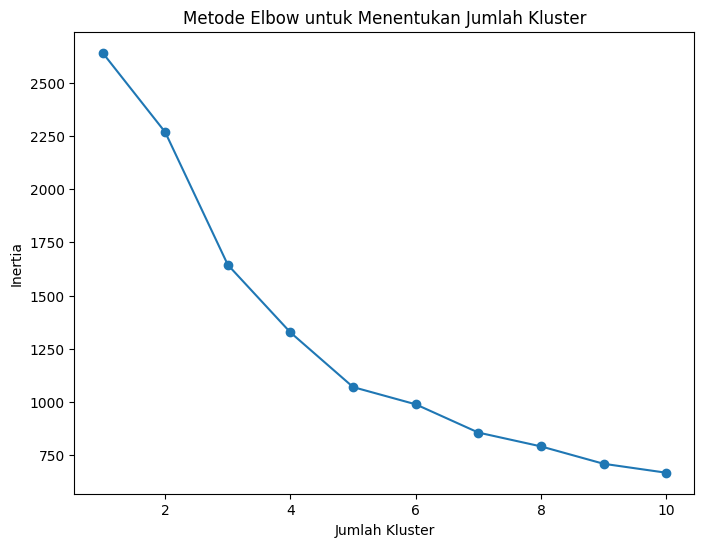

In [10]:
# Langkah 4: Menentukan jumlah kluster optimal menggunakan Metode Elbow
inertia = []  # Menyimpan nilai inertia untuk berbagai jumlah kluster
k_range = range(1, 11)  # Mencoba jumlah kluster dari 1 hingga 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Metode Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inertia')
plt.show()

In [11]:
# Find the optimal k using KneeLocator
knee = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
k_optimal = knee.elbow
print(f"Optimal k: {k_optimal}")

Optimal k: 5


In [12]:
# Langkah 5: Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Langkah 6: Analisis Hasil Klustering

# Menambahkan kolom Cluster ke dataset untuk analisis
# Analisis berdasarkan mean pembelian untuk setiap kluster
cluster_summary = data.groupby('Cluster').mean()
cluster_summary = cluster_summary.drop('Channel', axis=1)  # Remove channel column

# Tampilkan ringkasan dari tiap kluster
print(cluster_summary)

                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         5509.250000  10555.635417  16477.927083   1420.125000   
1        34188.627119   4850.576271   5870.000000   7215.559322   
2        16911.090909  34864.363636  46126.181818   3245.454545   
3         9112.235294   2965.404412   3783.702206   2413.591912   
4        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0             7199.406250   1658.791667  
1              955.847458   2491.796610  
2            23008.090909   4177.363636  
3              976.908088    974.926471  
4              755.500000  26776.000000  


In [13]:
# Get centroids and add random noise to spread them out
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)  # Transform centroids to PCA space
noise = np.random.normal(0, 0.1, centroids_pca.shape)  # Adjust the second parameter for more/less spread
centroids_spread = centroids_pca + noise

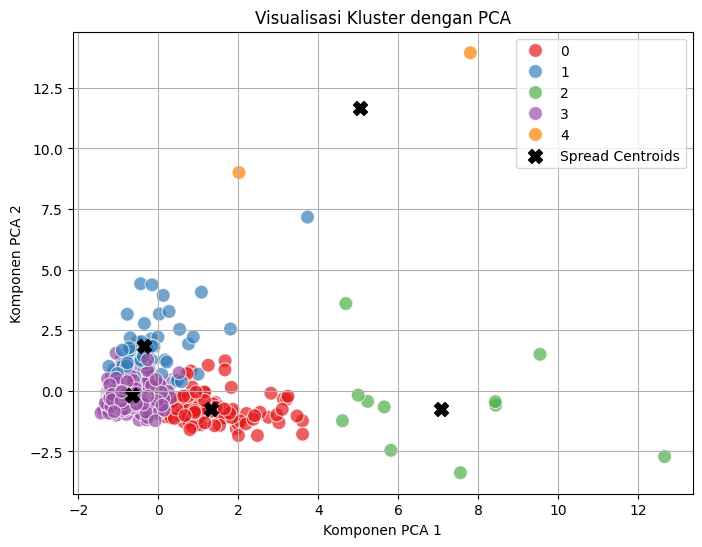

In [14]:
# Visualisasi Kluster dengan PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=kmeans.labels_, palette='Set1', s=100, alpha=0.7)
plt.scatter(centroids_spread[:, 0], centroids_spread[:, 1], s=100, c='black', marker='X', label='Spread Centroids')  # Plot spread centroids
plt.title('Visualisasi Kluster dengan PCA')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend()
plt.grid()
plt.show()

In [15]:
# Assuming you have a pandas DataFrame called 'df' with your data
# and 'kmeans' is your fitted KMeans model

# Get the cluster labels
cluster_labels = kmeans.labels_

# Create a DataFrame to count the members in each cluster
cluster_counts = pd.DataFrame(cluster_labels, columns=['Cluster']).value_counts()

# Sort the clusters by their count
cluster_counts = cluster_counts.sort_index()

# Display the results in a table format
print(cluster_counts.to_string())

Cluster
0           96
1           59
2           11
3          272
4            2


Rata-rata Pembelian Produk per Kluster:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         5509.250000  10555.635417  16477.927083   1420.125000   
1        34188.627119   4850.576271   5870.000000   7215.559322   
2        16911.090909  34864.363636  46126.181818   3245.454545   
3         9112.235294   2965.404412   3783.702206   2413.591912   
4        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0             7199.406250   1658.791667  
1              955.847458   2491.796610  
2            23008.090909   4177.363636  
3              976.908088    974.926471  
4              755.500000  26776.000000  


Perbandingan Pembelian Produk per Kluster:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         5509.250000  10555.635417  16477.927083   1420.125000   
1        34188.627119   4850.576271   5870.000000   7215.559322   
2        16911.090909  34864.363636  46126.181818   3245.454545   
3         9112.235294   2965.404412   3783.702206   2413.591912   
4        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0             7199.406250   1658.791667  
1              955.847458   2491.796610  
2            23008.090909   4177.363636  
3              976.908088    974.926471  
4              755.500000  26776.000000  


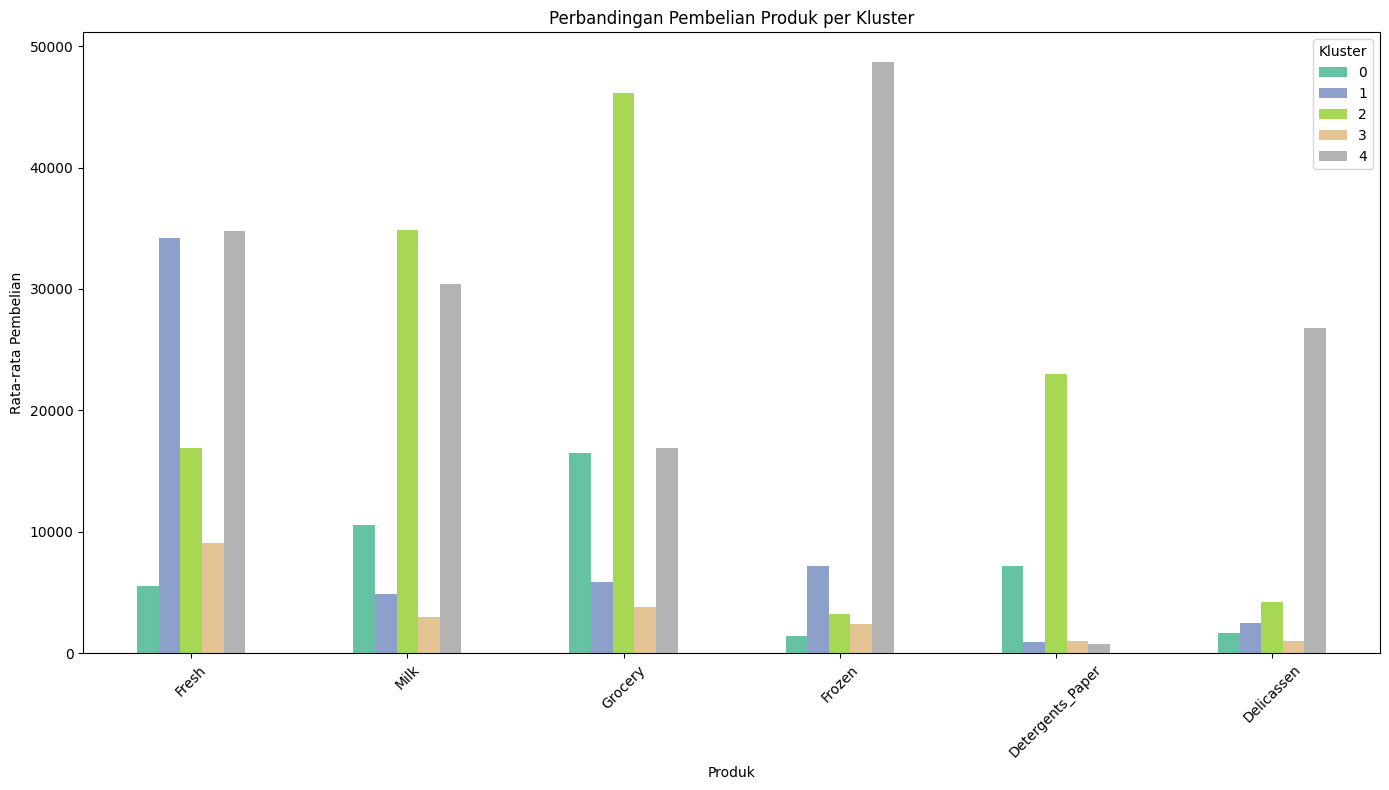